# **Lab Sheet: Clustering Text Data with DBSCAN in Python**

**Objective:**




Apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to cluster text data using Python.

Dataset:
Use any text dataset where clustering might reveal interesting patterns. You may use the 20 Newsgroups dataset from scikit-learn for this lab.

1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

2. Load and Preprocess the Dataset: Load the 20 Newsgroups dataset and perform basic text preprocessing.

In [3]:
# Load dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics', 'rec.sport.baseball'])
texts = newsgroups.data

# Basic text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Apply preprocessing
texts = [preprocess_text(text) for text in texts]
# print(texts)

3. Feature Extraction Using TF-IDF: Convert the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).

In [4]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the data
X = tfidf_vectorizer.fit_transform(texts)

# Convert to dense array
X_dense = X.toarray()


4. Dimensionality Reduction with PCA: Reduce the dimensionality of the data using PCA (Principal Component Analysis) to make it easier to visualize.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


5. Apply DBSCAN: Implement the DBSCAN algorithm on the reduced dataset and examine the clustering results.

In [6]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit DBSCAN to the PCA-transformed data
dbscan.fit(X_pca)

# Get cluster labels
labels = dbscan.labels_

# Identify the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 42
Estimated number of noise points: 550


6. Visualize the Clusters: Visualize the clusters found by DBSCAN using the PCA-transformed features.

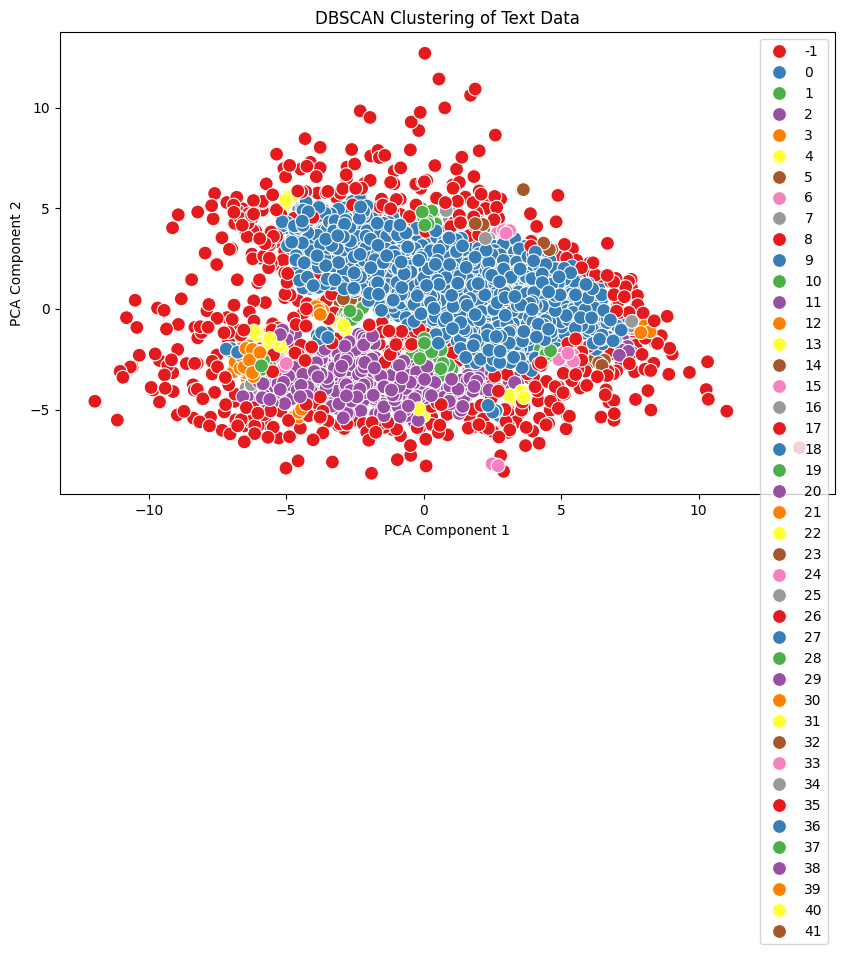

In [7]:
# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=100, legend='full')
plt.title('DBSCAN Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


7. Evaluate Clustering Performance: Evaluate the clustering results using a suitable metric, such as silhouette score.

In [8]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
if len(set(labels)) > 1:
    score = silhouette_score(X_pca, labels)
    print(f'Silhouette Score: {score:.2f}')
else:
    print('Silhouette Score is not defined for a single cluster.')


Silhouette Score: -0.45


8. Experiment with Different Parameters: Modify the eps and min_samples parameters to observe their impact on clustering performance.

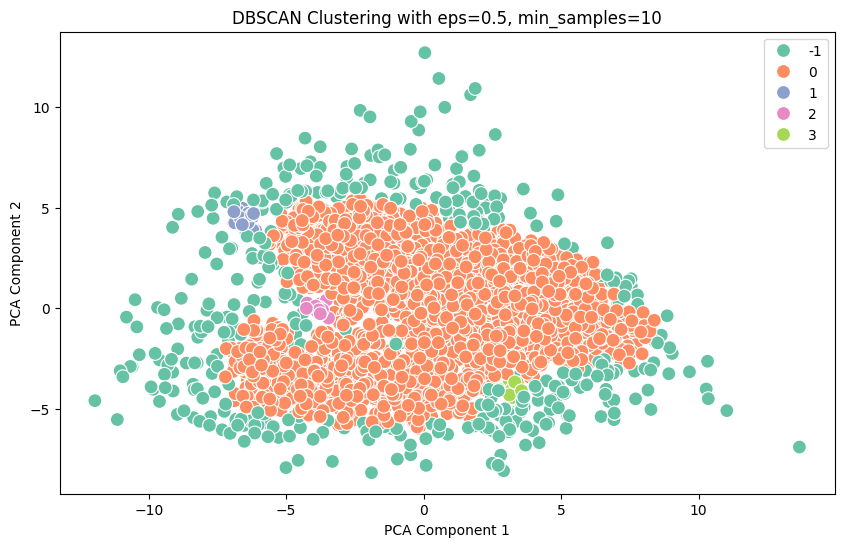

In [9]:
# Experiment with different eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_pca)
labels = dbscan.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=100, legend='full')
plt.title('DBSCAN Clustering with eps=0.5, min_samples=10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


9. Key points: DBSCAN is effective in identifying clusters of arbitrary shapes and can handle noise. However, it can struggle with clusters of varying densities and is sensitive to the choice of parameters like eps and min_samples.

**Excercise**
1. Experiment with different preprocessing techniques (e.g., stemming, stopword removal) and see how they impact clustering performance.

2. Cluster the unlabeled customer reviews using DBSCAN and assign labels based on cluster analysis. Then, combine these newly labeled reviews with the existing labeled dataset to train and evaluate a classification model, comparing its performance with and without the clustered data.

Estimated number of clusters: 34
Estimated number of noise points: 443


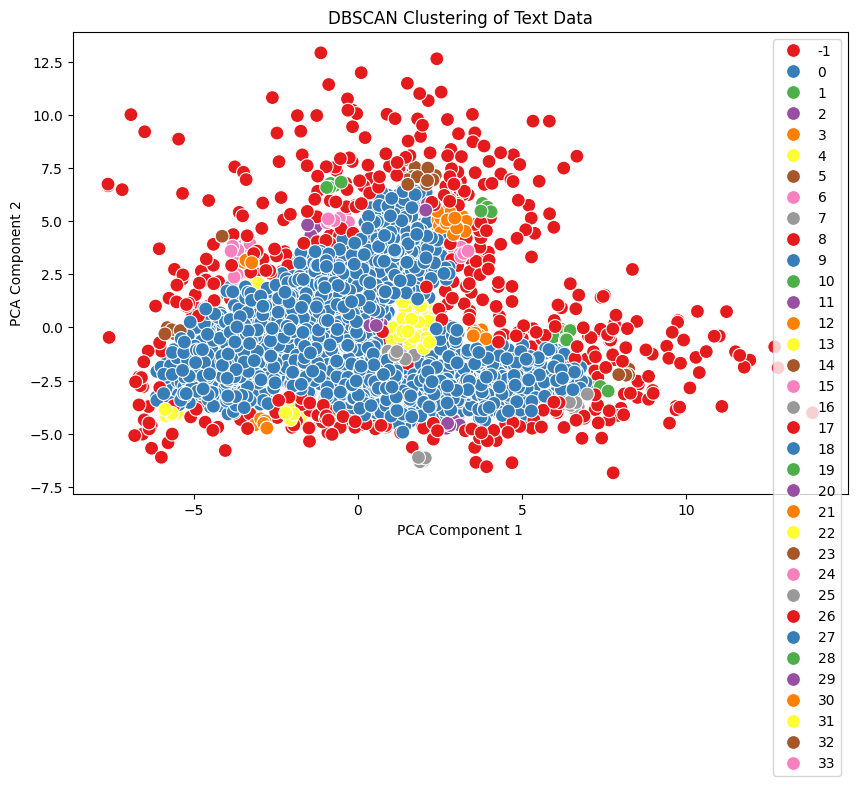

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics', 'rec.sport.baseball'])
texts = newsgroups.data

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_exercise(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\s+', ' ', text)
  words = text.split()
  words = [stemmer.stem(word) for word in words if word not in stop_words]
  text = ' '.join(words)
  return text

texts = [preprocess_exercise(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(texts)
X_dense = X.toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_pca)
labels = dbscan.labels_

n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_cluster}')
print(f'Estimated number of noise points: {n_noise}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=100, legend='full')
plt.title('DBSCAN Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Cluster the unlabeled customer reviews using DBSCAN and assign labels based on cluster analysis. Then, combine these newly labeled reviews with the existing labeled dataset to train and evaluate a classification model, comparing its performance with and without the clustered data.

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics', 'rec.sport.baseball'])
texts = newsgroups.data
labels = newsgroups.target

texts_labeled, texts_unlabeled, labels_labeled, _ = train_test_split(texts, labels, test_size=0.2, random_state=42)

labels_unlabeled = np.full(len(texts_unlabeled), -1)

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_unlabeled = vectorizer.fit_transform(texts_unlabeled)

scaler = StandardScaler()
X_unlabeled_scaled = scaler.fit_transform(X_unlabeled.toarray())

pca = PCA(n_components=2)
X_unlabeled_pca = pca.fit_transform(X_unlabeled_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_unlabeled_pca)
labels_unlabeled_predicted = dbscan.labels_

n_clusters_unlabeled = len(set(labels_unlabeled_predicted)) - (1 if -1 in labels_unlabeled_predicted else 0)

print(f'Estimated number of clusters in unlabeled data: {n_clusters_unlabeled}')


labeled_df = pd.DataFrame({'text': texts_labeled, 'label': labels_labeled})

psuedo_labeled_df = pd.DataFrame({'text': texts_unlabeled, 'label': labels_unlabeled_predicted})
psuedo_labeled_df = psuedo_labeled_df[psuedo_labeled_df['label'] != -1]

combined_df = pd.concat([labeled_df, psuedo_labeled_df], ignore_index=True)

X_combined = vectorizer.transform(combined_df['text'])
y_combined = combined_df['label']


X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Accuracy with Clustering: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    vectorizer.transform(texts_labeled),
    labels_labeled,
    test_size=0.2,
    random_state=42
)

clf_baseline = RandomForestClassifier()
clf_baseline.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = clf_baseline.predict(X_test_baseline)
print(f'Accuracy without Clustering: {accuracy_score(y_test_baseline, y_pred_baseline)}')
print(classification_report(y_test_baseline, y_pred_baseline))

Estimated number of clusters in unlabeled data: 30
Accuracy with Clustering: 0.8671726755218216
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       157
           1       0.85      0.89      0.87       159
           2       0.94      0.93      0.94       180
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          20       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy without Clustering: 0.9386892177589852
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       146
           1       0.94      0.97      0.95       172
           2       0.97      0.90      0.94       155

    accuracy                           0.94       473
   macro avg       0.94      0.94      0.94       473
weighted avg       0.94      0.94      0.94       473

